In [ ]:
# import libraries for later use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the house-price-train.csv dataset and save it as df
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv')

**Part 1 Data Understanding**

In [ ]:
# print the first a few rows to check data
print(df.head(5))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [ ]:
# print the shape of dataframe
print(df.shape)

(1460, 81)


In [ ]:
# display all columns when checking dataframe
pd.set_option('display.max_rows',None)

In [ ]:
# print the types of dataframe
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [ ]:
# check for missing values for each column
print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

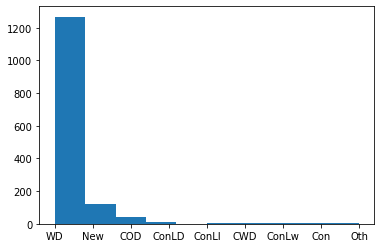

In [ ]:
# visualization of the distribution of a numerical column
plt.hist(df['SaleType'])
plt.show()

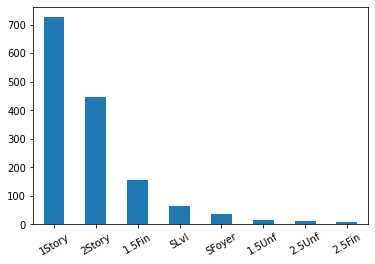

In [ ]:
# visualization of the distribution of a categorical column
df['HouseStyle'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 30)
plt.show()

In [ ]:
# group the data by a categorical column and calculate statistics
group_df = df.groupby('HouseStyle')['SalePrice'].mean().round(2)
print(group_df)

HouseStyle
1.5Fin    143116.74
1.5Unf    110150.00
1Story    175985.48
2.5Fin    220000.00
2.5Unf    157354.55
2Story    210051.76
SFoyer    135074.49
SLvl      166703.38
Name: SalePrice, dtype: float64


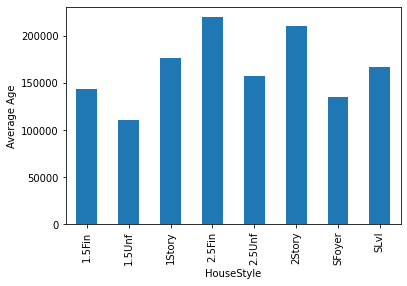

In [ ]:
# create a bar plot to visualize the mean of a numeric column for each category of a categorical column
group_df = df.groupby('HouseStyle')['SalePrice'].mean()
group_df.plot(kind = 'bar')
plt.ylabel('Average Age')
plt.show()

In [ ]:
# create a pivot table to summarize the data based on one condition numeric column
# Question: For each style of the house, what is the SalePrice average by HouseStyle
pivot_table = df.pivot_table(columns = 'HouseStyle', values = 'SalePrice', aggfunc = 'mean')
print(pivot_table)

HouseStyle        1.5Fin    1.5Unf         1Story    2.5Fin         2.5Unf  \
SalePrice   143116.74026  110150.0  175985.477961  220000.0  157354.545455   

HouseStyle         2Story         SFoyer           SLvl  
SalePrice   210051.764045  135074.486486  166703.384615  


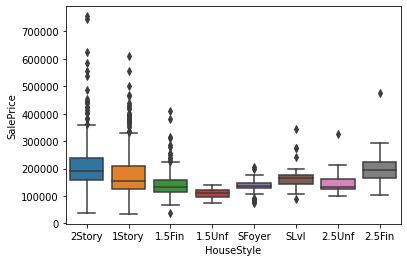

In [ ]:
# create a box plot to visualize the distribution of a numeric column by the categories of a categorical column
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = df)
plt.ylabel('SalePrice')
plt.show()

In [ ]:
# Choose the proper columns for later heatmap visualization
HeatMap_col = ['SalePrice', 'LotArea', 'YearBuilt', 'FullBath', 'HalfBath', 'GarageArea']
df[HeatMap_col].head(5)

,SalePrice,LotArea,YearBuilt,FullBath,HalfBath,GarageArea
0,208500,8450,2003,2,1,548
1,181500,9600,1976,2,0,460
2,223500,11250,2001,2,1,608
3,140000,9550,1915,1,0,642
4,250000,14260,2000,2,1,836


In [ ]:
# Set correlation for chosen columns for later heatmap visualization
cor_HeatMap_col = df[HeatMap_col].corr()
cor_HeatMap_col

,SalePrice,LotArea,YearBuilt,FullBath,HalfBath,GarageArea
SalePrice,1.000000,0.263843,0.522897,0.560664,0.284108,0.623431
LotArea,0.263843,1.000000,0.014228,0.126031,0.014259,0.180403
YearBuilt,0.522897,0.014228,1.000000,0.468271,0.242656,0.478954
FullBath,0.560664,0.126031,0.468271,1.000000,0.136381,0.405656
HalfBath,0.284108,0.014259,0.242656,0.136381,1.000000,0.163549
GarageArea,0.623431,0.180403,0.478954,0.405656,0.163549,1.000000


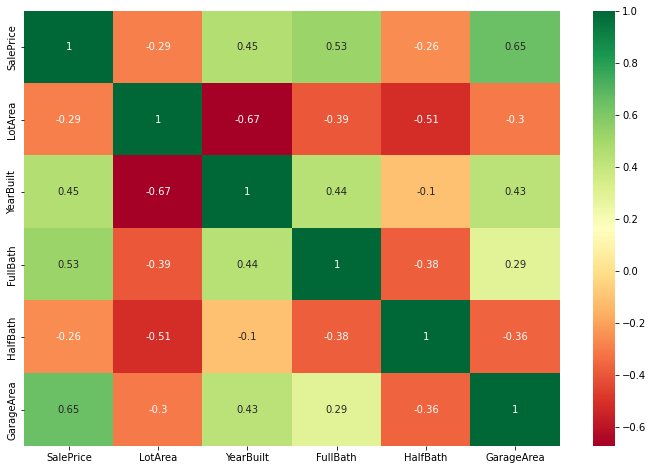

In [ ]:
# create a heatmap to visualize the correlation between multiple columns
plt.figure(figsize = (12, 8))
sns.heatmap(cor_HeatMap_col.corr(), cmap = 'RdYlGn', annot = True)
plt.show() 

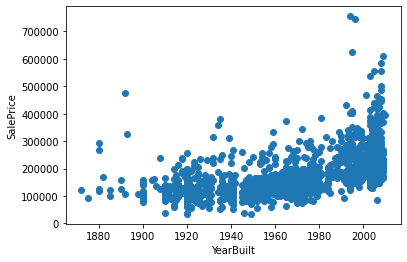

In [ ]:
# create a scatter plot to visualize the relationship between two numeric columns
plt.scatter(df['YearBuilt'], df['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

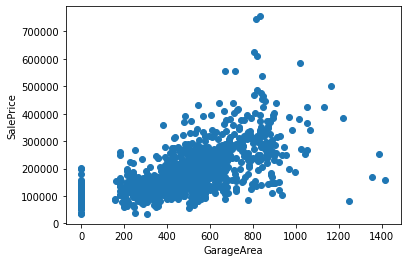

In [ ]:
# create a scatter plot to visualize the relationship between two numeric columns
plt.scatter(df['GarageArea'], df['SalePrice'])
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

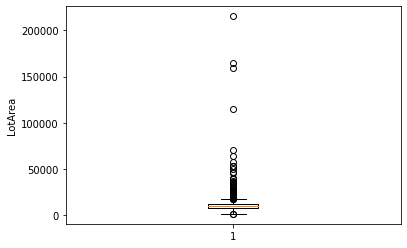

In [ ]:
# create a box plot to visualize the distribution of a numeric column
plt.boxplot(df['LotArea'])
plt.ylabel('LotArea')
plt.show()

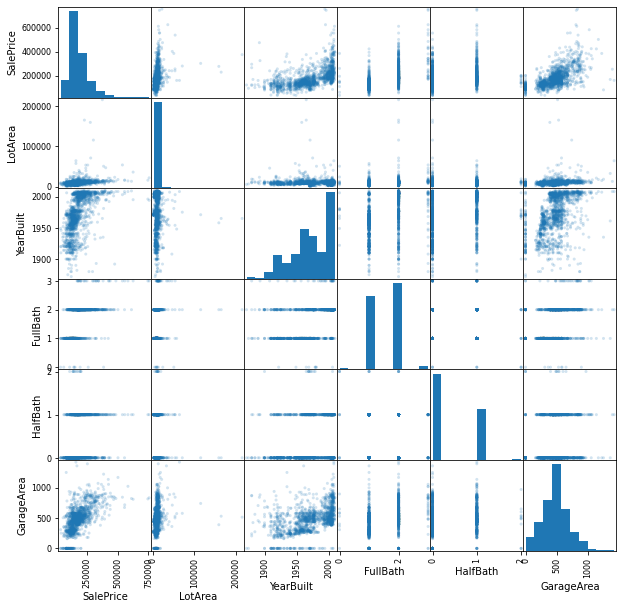

In [ ]:
# create a scatter plot matrix to visualize the relationships between multiple numeric columns
from pandas.plotting import scatter_matrix
scatter_matrix(df[['SalePrice', 'LotArea', 'YearBuilt', 'FullBath', 'HalfBath', 'GarageArea']], 
               alpha = 0.2, figsize = (10, 10))
plt.show()

**Part 2 Data Pre-processing**

In [ ]:
# create a copy of the original DataFrame
df_prep = df.copy()

In [ ]:
# check data types
print(df_prep.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [ ]:
# formatting all columns with object type in the dataset to strings
obj = df_prep.select_dtypes(include = np.object).columns.tolist()
df_prep[obj] = df_prep[obj].astype('string')

<ipython-input-292-489c872080cd>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obj = df_prep.select_dtypes(include = np.object).columns.tolist()


In [ ]:
# check correct format types
print(df_prep.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          string
LotFrontage      float64
LotArea            int64
Street            string
Alley             string
LotShape          string
LandContour       string
Utilities         string
LotConfig         string
LandSlope         string
Neighborhood      string
Condition1        string
Condition2        string
BldgType          string
HouseStyle        string
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         string
RoofMatl          string
Exterior1st       string
Exterior2nd       string
MasVnrType        string
MasVnrArea       float64
ExterQual         string
ExterCond         string
Foundation        string
BsmtQual          string
BsmtCond          string
BsmtExposure      string
BsmtFinType1      string
BsmtFinSF1         int64
BsmtFinType2      string
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           string


In [ ]:
# display the percentages of columns with missing values
print(df_prep.isnull().sum()/len(df_prep))

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [ ]:
# filling NA values for a numeric column with the mean value
df_prep['LotFrontage'] = df_prep['LotFrontage'].fillna(df_prep['LotFrontage'].mean())

In [ ]:
# drop the columns with missing values over certain percentage
df_prep.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], 
             axis = 1, inplace = True)

In [ ]:
# drop all rows with missing values remaining in the dataset
df_prep.dropna(axis = 0, how = 'any', inplace = True) 

In [ ]:
# check changes after cleaning missing values
print(df_prep.isnull().sum()/len(df_prep))

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

In [ ]:
# drop duplicates in the dataset
df_prep = df_prep.drop_duplicates()

In [ ]:
# drop outliers on specific columns based on the boxplot & scatter plot output 
df_prep = df_prep.drop(df_prep[df_prep['SalePrice'] > 600000].index)
df_prep = df_prep.drop(df_prep[df_prep['LotArea'] > 100000].index)

In [ ]:
# check dataset size after dropping
print(df_prep.shape)
# The original dataset had 1460 records, and after dropping it now has 1330
# which is aceptable after cleanning.

(1330, 76)


In [ ]:
# encode categorical variables using one-hot encoding
df_clean = df_prep.copy()
df_prep2 = pd.get_dummies(df_clean, columns = ['HouseStyle', 'SaleCondition'], 
                          prefix = ['HouseStyle', 'SaleCondition'])
print(df_prep2.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... HouseStyle_2.5Unf HouseStyle_2Story  \
0    AllPub    Inside  ...                 0                 1   
1    AllPub       FR2  ...                 0                 0   
2    AllPub    Inside  ...                 0                 1   
3    AllPub    Corner  ...                 0                 1   
4    AllPub       FR2  ...                 0                 1   

  HouseStyle_SFoyer HouseStyle_SLvl SaleCondition_Abnorml  \
0                 0               0                     0   


In [ ]:
# standardize the values of a numeric column
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
df_prep2['Sale_scaled'] = sclr.fit_transform(df_clean[['SalePrice']])
print(df_prep2['Sale_scaled'].head())

0    0.319001
1   -0.046548
2    0.522084
3   -0.608410
4    0.880863
Name: Sale_scaled, dtype: float64


In [ ]:
# bin the values of a numeric column
from sklearn.preprocessing import KBinsDiscretizer
dctr = KBinsDiscretizer(n_bins = 3, encode = 'ordinal')
df_prep2['Sale_binned'] = dctr.fit_transform(df_clean[['SalePrice']])
print(df_prep2.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... HouseStyle_SFoyer HouseStyle_SLvl  \
0    AllPub    Inside  ...                 0               0   
1    AllPub       FR2  ...                 0               0   
2    AllPub    Inside  ...                 0               0   
3    AllPub    Corner  ...                 0               0   
4    AllPub       FR2  ...                 0               0   

  SaleCondition_Abnorml SaleCondition_AdjLand SaleCondition_Alloca  \
0                     0                     0                   

In [ ]:
# apply a min-max scaling to a numeric column
from sklearn.preprocessing import MinMaxScaler
sclr2 = MinMaxScaler()
df_prep2['Sale_scaled_minmax'] = sclr2.fit_transform(df_clean[['SalePrice']])
print(df_prep2.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... HouseStyle_SLvl SaleCondition_Abnorml  \
0    AllPub    Inside  ...               0                     0   
1    AllPub       FR2  ...               0                     0   
2    AllPub    Inside  ...               0                     0   
3    AllPub    Corner  ...               0                     1   
4    AllPub       FR2  ...               0                     0   

  SaleCondition_AdjLand SaleCondition_Alloca SaleCondition_Family  \
0                     0                  

In [ ]:
# calculate summary statistics for a numeric column
print(df_clean['SalePrice'].describe())

count      1330.000000
mean     184938.088722
std       73889.341743
min       35311.000000
25%      135000.000000
50%      168000.000000
75%      218907.500000
max      582933.000000
Name: SalePrice, dtype: float64


In [ ]:
# calculate the skewness and kurtosis of a numeric column
print(df_clean['SalePrice'].skew())
print(df_clean['SalePrice'].kurtosis())

1.471155101405446
3.0850022672509634


In [ ]:
# calculate the correlation between two numeric columns
print(df_clean['SalePrice'].corr(df['GarageArea']))

0.6183768861977328


In [ ]:
# calculate the correlation between two numeric columns
print(df_clean['SalePrice'].corr(df['LotArea']))

0.33071159332115724


In [ ]:
# calculate the correlation between two numeric columns
print(df_clean['SalePrice'].corr(df['YearBuilt']))

0.5249930885212318


In [ ]:
# use a t-test to compare the means of two numeric columns
from scipy.stats import ttest_ind
t, p = ttest_ind(df_clean['SalePrice'], df_clean['GarageArea'])
print(t, p)
# reject the null hypothesis & test is statistically significant

91.03164123739093 0.0


In [ ]:
# use an ANOVA test to compare the means of multiple numeric columns
from scipy.stats import f_oneway
f, p = f_oneway(df_clean['SalePrice'], 
                df_clean['GarageArea'], 
                df_clean['YearBuilt'])
print(f, p)
# reject the null hypothesis & test is statistically significant

8221.122817580204 0.0


**Part 3 Data Post Processing (Collinearity)**

In [ ]:
# group the fixed & the most-related columns based on previous statistics
# also create correlation table for the chosen columns
GroupedCol = ['SalePrice', 'LotArea', 'YearBuilt', 'GarageArea']
df_clean[GroupedCol].head(5)
cor_GroupedCol = df_clean[GroupedCol].corr()
cor_GroupedCol
# the values of correlation are changed compare to previous

,SalePrice,LotArea,YearBuilt,GarageArea
SalePrice,1.000000,0.330712,0.524993,0.618377
LotArea,0.330712,1.000000,0.010073,0.287340
YearBuilt,0.524993,0.010073,1.000000,0.442185
GarageArea,0.618377,0.287340,0.442185,1.000000


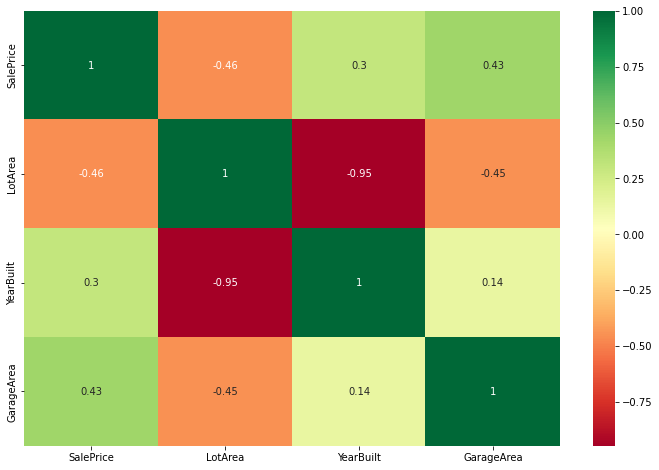

In [ ]:
# create a heatmap to visualize the correlation between the chosen columns
plt.figure(figsize = (12, 8))
sns.heatmap(cor_GroupedCol.corr(), cmap = 'RdYlGn', annot = True)
plt.show()
# we found that the corr value for GarageArea has decreased and becomes
# less related to the SalePrice, but still related. On the other hand,
# lotArea has increase and become more related to the SalePrice after
# Correcting missing values and outliers, the pre-porcessing step.

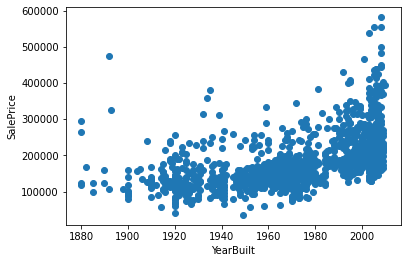

In [ ]:
# create a scatter plot to visualize the relationship between two numeric columns
plt.scatter(df_clean['YearBuilt'], df_clean['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()
# outliers have been removed, the scale of graph has zoomed in

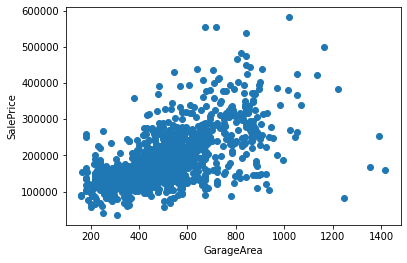

In [ ]:
# create a scatter plot to visualize the relationship between two numeric columns
plt.scatter(df_clean['GarageArea'], df_clean['SalePrice'])
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()
# by removing the outliers and missing values, the graph now showing dots are 
# more connected and concentrated

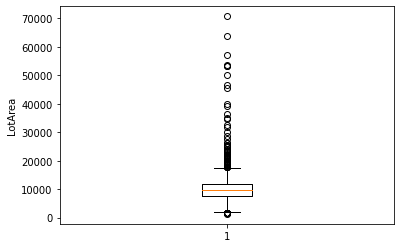

In [ ]:
# create a box plot to visualize the distribution of a numeric column
plt.boxplot(df_clean['LotArea'])
plt.ylabel('LotArea')
plt.show()
# points or dots on the boxplot graph are more connected and closed to each other
# after the removal of outliers.

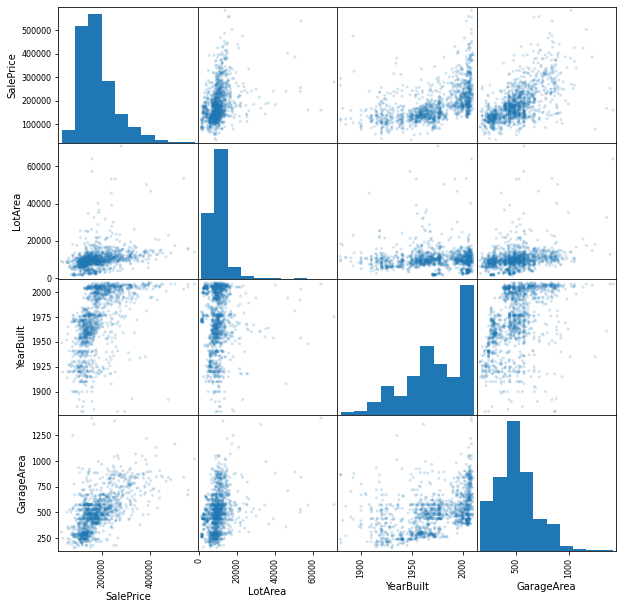

In [ ]:
# create a scatter plot matrix to visualize the relationships between multiple numeric columns
scatter_matrix(df_clean[['SalePrice', 'LotArea', 'YearBuilt', 'GarageArea']], 
               alpha = 0.2, figsize = (10, 10))
plt.show()
# scatter plots are more detailed and clear after foucusing on the specific 
# fixed columns after data pre-processing